# **Análisis Exploratorio en una TSA**

##**Carga de la librerias**

In [1]:
# Tratamiento de datos
import numpy as np
import pandas as pd
import statsmodels.api as sm
import seaborn as sns
# Gráficos
# ==============================================================================
import matplotlib.pyplot as plt
%matplotlib inline


##**Montar google drive para guardar la informacion**

In [2]:
#Montar google drive para guardar la informacion
from google.colab import drive
drive.mount('/content/gdrive',force_remount=True)

# carga directorio donde se almacena el .csv
base_dir = "/content/gdrive/MyDrive/DataSet/"
print(base_dir)

KeyboardInterrupt: 

#**Lectura del dataset**

## **Series de Tiempo (TSA)**

In [ ]:
#Cargamos los CSV con los Datos
df_power_system = pd.read_csv(base_dir + "power_system.csv")
df_power_system

,Unnamed: 0,Date,Consumption,Wind,Solar,Wind+Solar
0,0,2006-01-01,1069.18400,NaN,NaN,NaN
1,1,2006-01-02,1380.52100,NaN,NaN,NaN
2,2,2006-01-03,1442.53300,NaN,NaN,NaN
3,3,2006-01-04,1457.21700,NaN,NaN,NaN
4,4,2006-01-05,1477.13100,NaN,NaN,NaN
...,...,...,...,...,...,...
4378,4378,2017-12-27,1263.94091,394.507,16.530,411.037
4379,4379,2017-12-28,1299.86398,506.424,14.162,520.586
4380,4380,2017-12-29,1295.08753,584.277,29.854,614.131
4381,4381,2017-12-30,1215.44897,721.247,7.467,728.714


## **Breve descripcion del dataset**




In [ ]:
# Filas y columnas
print(df_power_system.shape)
print('\n')

# filas no nulas y tipo de variables
print(df_power_system.info())
print('\n')

# Estadístico de las categoricas:
print(df_power_system.describe(include = 'object'))
print('\n')

# Estadísticos descriptivos de las variables numericas:
df_power_system.describe()



(4383, 6)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4383 entries, 0 to 4382
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   4383 non-null   int64  
 1   Date         4383 non-null   object 
 2   Consumption  4383 non-null   float64
 3   Wind         2920 non-null   float64
 4   Solar        2188 non-null   float64
 5   Wind+Solar   2187 non-null   float64
dtypes: float64(4), int64(1), object(1)
memory usage: 205.6+ KB
None


              Date
count         4383
unique        4383
top     2017-12-31
freq             1




,Unnamed: 0,Consumption,Wind,Solar,Wind+Solar
count,4383.000000,4383.000000,2920.000000,2188.000000,2187.000000
mean,2191.000000,1338.675836,164.814173,89.258695,272.663481
std,1265.407444,165.775710,143.692732,58.550099,146.319884
min,0.000000,842.395000,5.757000,1.968000,21.478000
25%,1095.500000,1217.859000,62.353250,35.179250,172.185500
50%,2191.000000,1367.123000,119.098000,86.407000,240.991000
75%,3286.500000,1457.761000,217.900250,135.071500,338.988000
max,4382.000000,1709.568000,826.278000,241.580000,851.556000


# **Primero se convertir  la columna Date que esta object en un objeto datetime o serie de tiempo**

In [ ]:
#1. Paso convertir  la columna Date en un objeto datetime o serie de tiempo
df_power_system['Date'] = pd.to_datetime(df_power_system['Date'])
df_power_system.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4383 entries, 0 to 4382
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Unnamed: 0   4383 non-null   int64         
 1   Date         4383 non-null   datetime64[ns]
 2   Consumption  4383 non-null   float64       
 3   Wind         2920 non-null   float64       
 4   Solar        2188 non-null   float64       
 5   Wind+Solar   2187 non-null   float64       
dtypes: datetime64[ns](1), float64(4), int64(1)
memory usage: 205.6 KB


# **Convertir la fecha en indice**

In [ ]:
#2. Convertimos la Date (fecha) en el Index del dataset
df_power_system = df_power_system.set_index('Date')
df_power_system

,Unnamed: 0,Consumption,Wind,Solar,Wind+Solar
Date,,,,,
2006-01-01,0,1069.18400,NaN,NaN,NaN
2006-01-02,1,1380.52100,NaN,NaN,NaN
2006-01-03,2,1442.53300,NaN,NaN,NaN
2006-01-04,3,1457.21700,NaN,NaN,NaN
2006-01-05,4,1477.13100,NaN,NaN,NaN
...,...,...,...,...,...
2017-12-27,4378,1263.94091,394.507,16.530,411.037
2017-12-28,4379,1299.86398,506.424,14.162,520.586
2017-12-29,4380,1295.08753,584.277,29.854,614.131


# **Ordenamos la serie de tiempo de forma ascendente**

In [ ]:
#3. Ordenamos la serie de tiempo de forma ascendente
df_power_system.sort_index(inplace=True)
df_power_system

,Unnamed: 0,Consumption,Wind,Solar,Wind+Solar
Date,,,,,
2006-01-01,0,1069.18400,NaN,NaN,NaN
2006-01-02,1,1380.52100,NaN,NaN,NaN
2006-01-03,2,1442.53300,NaN,NaN,NaN
2006-01-04,3,1457.21700,NaN,NaN,NaN
2006-01-05,4,1477.13100,NaN,NaN,NaN
...,...,...,...,...,...
2017-12-27,4378,1263.94091,394.507,16.530,411.037
2017-12-28,4379,1299.86398,506.424,14.162,520.586
2017-12-29,4380,1295.08753,584.277,29.854,614.131


#**Eliminar las columnas irrelevantes**

In [ ]:
df_power_system.columns # miramos las columnas del dataset

Index(['Unnamed: 0', 'Consumption', 'Wind', 'Solar', 'Wind+Solar'], dtype='object')

In [ ]:
#4. Eliminar las columnas irrelevantes
df_power_system.drop(columns=['Unnamed: 0'], inplace=True)
df_power_system

,Consumption,Wind,Solar,Wind+Solar
Date,,,,
2006-01-01,1069.18400,NaN,NaN,NaN
2006-01-02,1380.52100,NaN,NaN,NaN
2006-01-03,1442.53300,NaN,NaN,NaN
2006-01-04,1457.21700,NaN,NaN,NaN
2006-01-05,1477.13100,NaN,NaN,NaN
...,...,...,...,...
2017-12-27,1263.94091,394.507,16.530,411.037
2017-12-28,1299.86398,506.424,14.162,520.586
2017-12-29,1295.08753,584.277,29.854,614.131


# **Analisis Exploratorio de Datos (EDA)**

## **Grafica de las variables respecto al tiempo**

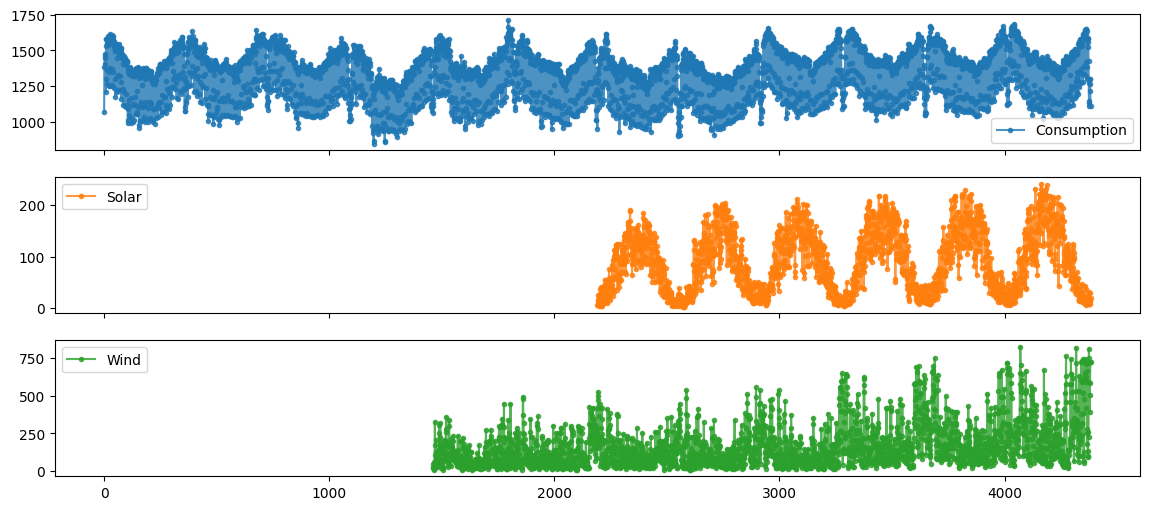

In [ ]:
#5. Entender cada una de las variables con que cuenta el dataset para esto se grafican las variables

cols_to_plot = ['Consumption', 'Solar', 'Wind']
axes = df_power_system[cols_to_plot].plot(marker='.', alpha=0.8,kind='line',
figsize=(14, 6), subplots=True)

Text(0.5, 1.0, 'Wind')

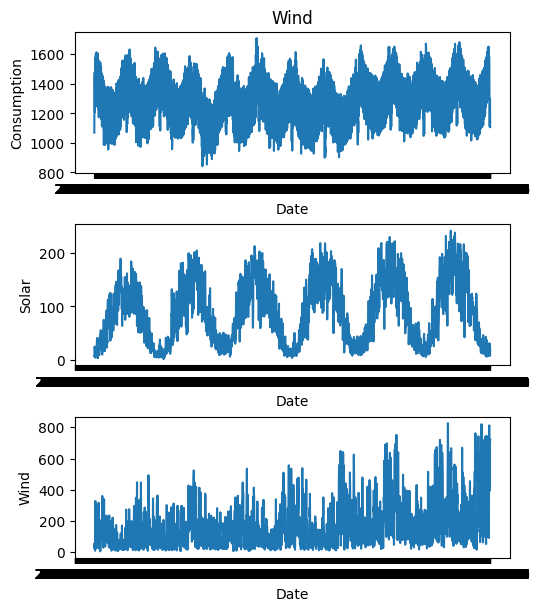

In [ ]:
fig = plt.figure(figsize=(14, 6), constrained_layout=True)
gs = fig.add_gridspec(ncols=3, nrows=3)

top_left = fig.add_subplot(gs[0, 0])
sns.lineplot(x='Date', y='Consumption', data=df_power_system)
top_left.set_title('Consumption')


mid_left = fig.add_subplot(gs[1, 0])
sns.lineplot(x='Date', y='Solar', data=df_power_system)
top_left.set_title('Solar')


mid_left = fig.add_subplot(gs[2, 0])
sns.lineplot(x='Date', y='Wind', data=df_power_system)
top_left.set_title('Wind')



## **Identificar datos faltantes**

In [ ]:
#6. Identificar datos faltantes
print('Cantidad de Datos Faltantes')
for column in df_power_system:
  nans = df_power_system[column].isna().sum()
  print(f'\tColumna: {column} {nans}')

Cantidad de Datos Faltantes
	Columna: Unnamed: 0 0
	Columna: Date 0
	Columna: Consumption 0
	Columna: Wind 1463
	Columna: Solar 2195
	Columna: Wind+Solar 2196


##**Analizar la periodicidad**

In [ ]:
# Ensure the index is a datetime index
if not pd.api.types.is_datetime64_any_dtype(df_power_system.index):
    # Assuming the index contains datetime strings or similar
    df_power_system.index = pd.to_datetime(df_power_system.index)

# 7. analizar la periodicidad
df_time_diffs = df_power_system.index.to_series().diff().dt.total_seconds() #diferencia entre las marcas de tiempo en el índice del DataFrame. calcula estas diferencias en segundos y luego cuenta cuántas veces aparece cada diferencia, da una idea de la periodicidad de los datos.
print(df_time_diffs.value_counts())

1.000000e-09    4382
Name: count, dtype: int64


## **Verificar que no existan datos repetidos**

In [ ]:
#8. Verificar que no existan datos repetidos
print(f'Tamaño del dataset antes de eliminar las filas repetidas es: {df_power_system.shape}')
df_power_system.drop_duplicates(inplace=True)
print(f'Tamaño del dataset después de eliminar las filas repetidas es: {df_power_system.shape}')

Tamaño del dataset antes de eliminar las filas repetidas es: (4383, 6)
Tamaño del dataset después de eliminar las filas repetidas es: (4383, 6)


# **Intervalos de tiempo fijo**

In [ ]:
# Si se tienen multiples intervalos de tiempo conviene dejar uno solo
df2 = df_power_system.asfreq(freq='H', method='bfill' ) #Cambia la frecuencia del índice del DataFrame a una frecuencia horaria.

df_time_diffs = df2.index.to_series().diff().dt.total_seconds()
print(df_time_diffs.value_counts())
print('\n')

# Identificar datos faltantes
print('Cantidad de Datos Faltantes')
for column in df2:
  nans = df2[column].isna().sum()
  print(f'\tColumna{column}: {nans}')

Series([], Name: count, dtype: int64)


Cantidad de Datos Faltantes
	ColumnaUnnamed: 0: 0
	ColumnaDate: 0
	ColumnaConsumption: 0
	ColumnaWind: 1
	ColumnaSolar: 1
	ColumnaWind+Solar: 1


<ipython-input-31-dc94579fc803>:2: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df2 = df_power_system.asfreq(freq='H', method='bfill' ) #Cambia la frecuencia del índice del DataFrame a una frecuencia horaria.


In [ ]:
# Verificar Que el promedio no se vea afectado por el muestreo
# Calculate mean only for numeric columns in the original dataset
numeric_cols_original = df_power_system.select_dtypes(include=np.number).columns

print('Promedio dataset Original (solo columnas numéricas)')
for column in numeric_cols_original:
  print(f'\tColumna {column}: {df_power_system[column].mean()}')


# Calculate mean for all columns in the modified dataset (assuming they are now numeric or can be averaged)
# Check data types in df2 to ensure they are appropriate for mean calculation
print('\nPromedio dataset Modificado (df2)')
for column in df2.columns:
    if np.issubdtype(df2[column].dtype, np.number): # Check if the column is numeric
        print(f'\tColumna {column}: {df2[column].mean()}')
    else:
        print(f'\tColumna {column}: Cannot calculate mean (non-numeric type)')

Promedio dataset Original (solo columnas numéricas)
	Columna Unnamed: 0: 2191.0
	Columna Consumption: 1338.6758355897787
	Columna Wind: 164.81417260273975
	Columna Solar: 89.25869469835466
	Columna Wind+Solar: 272.6634814814815

Promedio dataset Modificado (df2)
	Columna Unnamed: 0: 0.0
	Columna Date: Cannot calculate mean (non-numeric type)
	Columna Consumption: 1069.1840000000002
	Columna Wind: nan
	Columna Solar: nan
	Columna Wind+Solar: nan


In [ ]:
# Add columns with year, month, and weekday name
df_power_system['Year'] = df_power_system.index.year
df_power_system['Month'] = df_power_system.index.month
df_power_system['Weekday Name'] = df_power_system.index.day_name()
df_power_system

,Unnamed: 0,Date,Consumption,Wind,Solar,Wind+Solar,Year,Month,Weekday Name
1970-01-01 00:00:00.000000000,0,2006-01-01,1069.18400,NaN,NaN,NaN,1970,1,Thursday
1970-01-01 00:00:00.000000001,1,2006-01-02,1380.52100,NaN,NaN,NaN,1970,1,Thursday
1970-01-01 00:00:00.000000002,2,2006-01-03,1442.53300,NaN,NaN,NaN,1970,1,Thursday
1970-01-01 00:00:00.000000003,3,2006-01-04,1457.21700,NaN,NaN,NaN,1970,1,Thursday
1970-01-01 00:00:00.000000004,4,2006-01-05,1477.13100,NaN,NaN,NaN,1970,1,Thursday
...,...,...,...,...,...,...,...,...,...
1970-01-01 00:00:00.000004378,4378,2017-12-27,1263.94091,394.507,16.530,411.037,1970,1,Thursday
1970-01-01 00:00:00.000004379,4379,2017-12-28,1299.86398,506.424,14.162,520.586,1970,1,Thursday
1970-01-01 00:00:00.000004380,4380,2017-12-29,1295.08753,584.277,29.854,614.131,1970,1,Thursday
1970-01-01 00:00:00.000004381,4381,2017-12-30,1215.44897,721.247,7.467,728.714,1970,1,Thursday


In [ ]:
df_power_system.tail()

,Unnamed: 0,Date,Consumption,Wind,Solar,Wind+Solar,Year,Month,Weekday Name
1970-01-01 00:00:00.000004378,4378,2017-12-27,1263.94091,394.507,16.530,411.037,1970,1,Thursday
1970-01-01 00:00:00.000004379,4379,2017-12-28,1299.86398,506.424,14.162,520.586,1970,1,Thursday
1970-01-01 00:00:00.000004380,4380,2017-12-29,1295.08753,584.277,29.854,614.131,1970,1,Thursday
1970-01-01 00:00:00.000004381,4381,2017-12-30,1215.44897,721.247,7.467,728.714,1970,1,Thursday
1970-01-01 00:00:00.000004382,4382,2017-12-31,1107.11488,721.176,19.980,741.156,1970,1,Thursday


<Axes: >

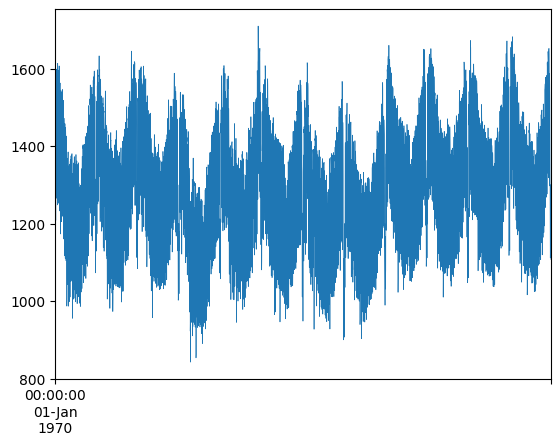

In [ ]:
df_power_system['Consumption'].plot(linewidth=0.5)

In [ ]:
ax = df_power_system.loc['2016-01-01', 'Consumption'].plot()
ax.set_ylabel('Daily Consumption (GWh)');

KeyError: '2016-01-01'

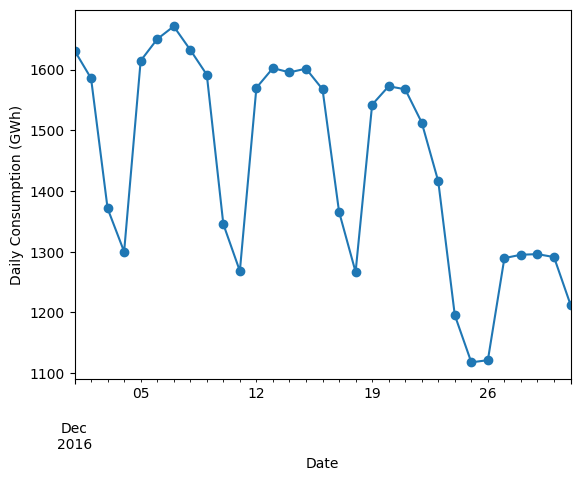

In [ ]:
ax = df_power_system.loc['2016-12', 'Consumption'].plot(marker='o', linestyle='-')
ax.set_ylabel('Daily Consumption (GWh)');

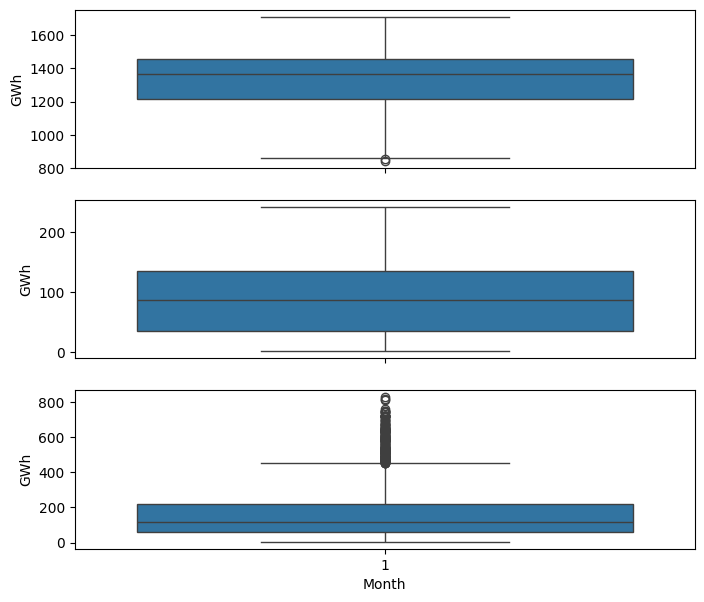

In [ ]:
fig, axes = plt.subplots(3, 1, figsize=(8, 7), sharex=True)
for name, ax in zip(['Consumption', 'Solar', 'Wind'], axes):
    sns.boxplot(data=df_power_system, x='Month', y=name, ax=ax)
    ax.set_ylabel('GWh')


<ipython-input-39-1009ef57e606>:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  power_Date = df_power_system['Consumption'].resample('M').median() #mensual ('M'), trimestral ('Q'),


<Axes: xlabel='Date'>

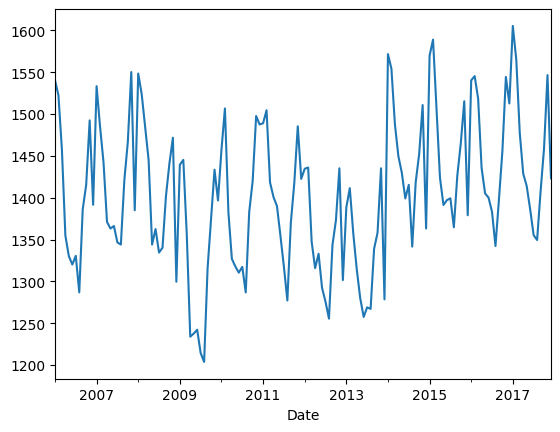

In [ ]:
# ‘M’, ‘A’, ‘Q’, ‘BM’, ‘BA’, ‘BQ’, and ‘W’
power_Date = df_power_system['Consumption'].resample('M').median() #mensual ('M'), trimestral ('Q'),
#power_Date
power_Date.plot()

<ipython-input-40-2974df2e08a8>:4: FutureWarning: 'y' is deprecated and will be removed in a future version, please use 'YE' instead.
  power_Date = df_power_system['Consumption'].resample('y').median()


<Axes: xlabel='Date'>

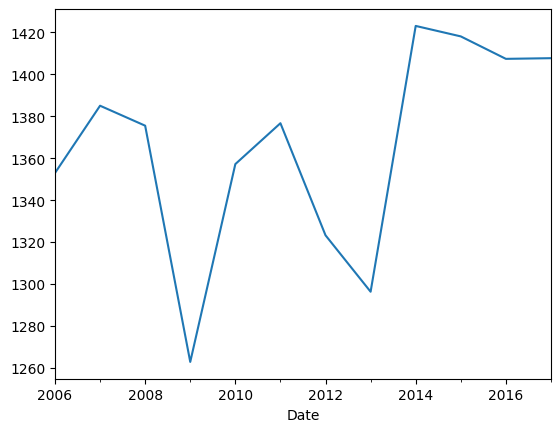

In [ ]:
#power_Date = df_power_system['Solar'].resample('Y').median()
#power_Date = df_power_system['Solar'].loc['2016'].resample('Y').max()
#power_Date = df_power_system['Solar'].loc['2018']
power_Date = df_power_system['Consumption'].resample('y').median()
power_Date.plot()

In [ ]:
power_weak_mean = df_power_system['Consumption'].loc['2017-12-1':'2017-12-31'].mean()
power_weak_mean

1435.8420745161288

<Axes: xlabel='Date'>

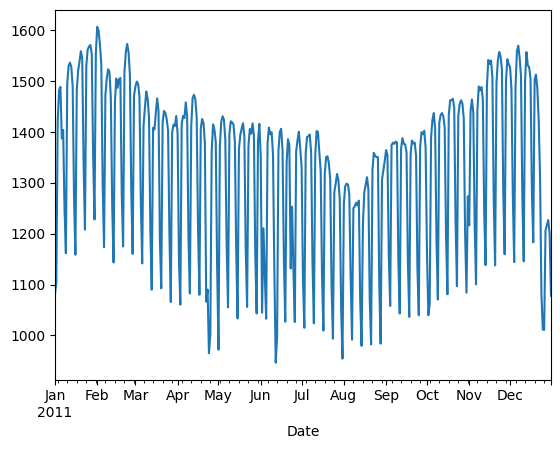

In [ ]:
power_weak_mean = df_power_system['Consumption'].loc["2011"]
power_weak_mean.plot()

<Axes: xlabel='Date'>

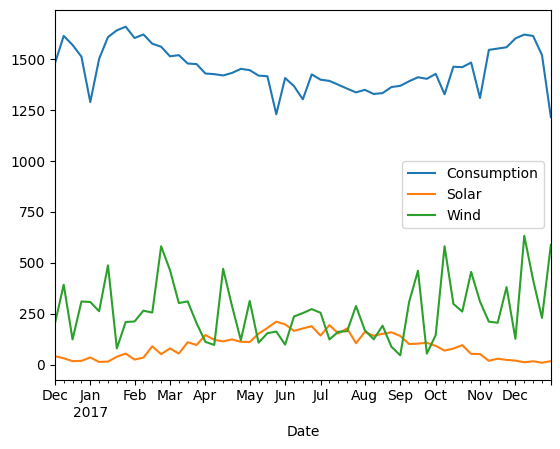

In [ ]:
power1=df_power_system[['Consumption', 'Solar', 'Wind']].loc['2016-12-1':'2017-12-31'].resample('W').median()
power1
power1.plot()

<Axes: xlabel='Date'>

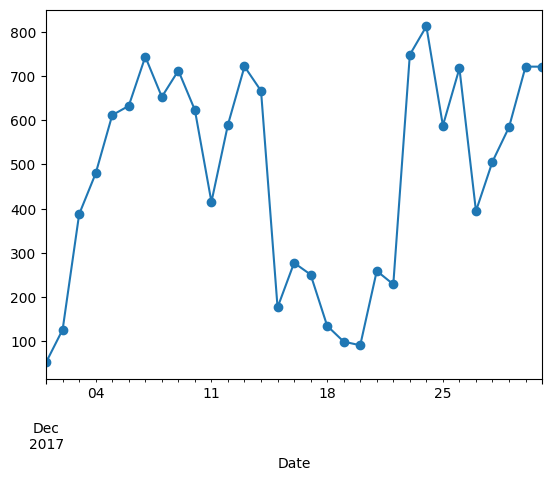

In [ ]:
power1=df_power_system['Wind'].loc['2017-12-1':'2017-12-31'].resample('D').mean()
power1
power1.plot(marker='o', linestyle='-')

In [ ]:
#Cargamos los CSV con los Datos
df_power_system = pd.read_csv(base_dir + "power_system.csv")
df_power_system

,Unnamed: 0,Date,Consumption,Wind,Solar,Wind+Solar
0,0,2006-01-01,1069.18400,NaN,NaN,NaN
1,1,2006-01-02,1380.52100,NaN,NaN,NaN
2,2,2006-01-03,1442.53300,NaN,NaN,NaN
3,3,2006-01-04,1457.21700,NaN,NaN,NaN
4,4,2006-01-05,1477.13100,NaN,NaN,NaN
...,...,...,...,...,...,...
4378,4378,2017-12-27,1263.94091,394.507,16.530,411.037
4379,4379,2017-12-28,1299.86398,506.424,14.162,520.586
4380,4380,2017-12-29,1295.08753,584.277,29.854,614.131
4381,4381,2017-12-30,1215.44897,721.247,7.467,728.714


In [ ]:
#1. Paso convertir  la columna Date en un objeto datetime o serie de tiempo
df_power_system['Date'] = pd.to_datetime(df_power_system['Date'])
df_power_system.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4383 entries, 0 to 4382
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Unnamed: 0   4383 non-null   int64         
 1   Date         4383 non-null   datetime64[ns]
 2   Consumption  4383 non-null   float64       
 3   Wind         2920 non-null   float64       
 4   Solar        2188 non-null   float64       
 5   Wind+Solar   2187 non-null   float64       
dtypes: datetime64[ns](1), float64(4), int64(1)
memory usage: 205.6 KB


In [ ]:
df_power_system['media_movil'] = df_power_system['Consumption'].rolling(window=7).mean()
df_power_system

,Unnamed: 0,Date,Consumption,Wind,Solar,Wind+Solar,media_movil
0,0,2006-01-01,1069.18400,NaN,NaN,NaN,NaN
1,1,2006-01-02,1380.52100,NaN,NaN,NaN,NaN
2,2,2006-01-03,1442.53300,NaN,NaN,NaN,NaN
3,3,2006-01-04,1457.21700,NaN,NaN,NaN,NaN
4,4,2006-01-05,1477.13100,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
4378,4378,2017-12-27,1263.94091,394.507,16.530,411.037,1266.125593
4379,4379,2017-12-28,1299.86398,506.424,14.162,520.586,1234.624439
4380,4380,2017-12-29,1295.08753,584.277,29.854,614.131,1216.317254
4381,4381,2017-12-30,1215.44897,721.247,7.467,728.714,1208.214129


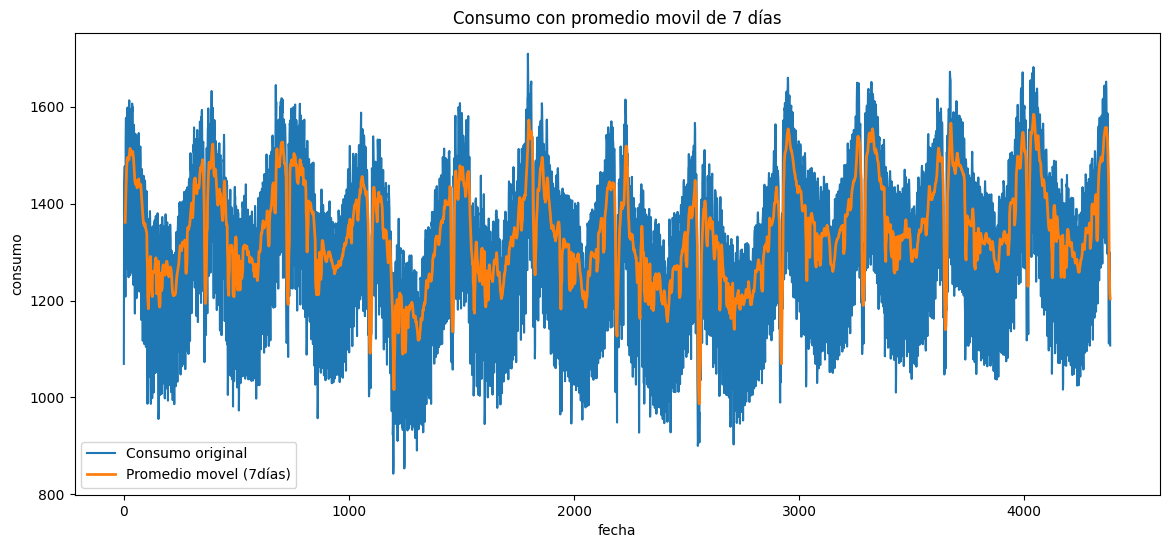

In [ ]:
fig, ax = plt.subplots(figsize=(14,6))
df_power_system['Consumption'].plot(ax=ax, label ='Consumo original')
df_power_system['media_movil'].plot(ax=ax, label= 'Promedio movel (7días)', linewidth=2)
ax.set_title("Consumo con promedio movil de 7 días")
ax.set_xlabel('fecha')
ax.set_ylabel('consumo')
ax.legend()
plt.show()

In [ ]:
#Normalizamos
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df_power_system['consumo_normalizado'] = scaler.fit_transform(df_power_system[['Consumption']])
df_power_system.head()


,Unnamed: 0,Date,Consumption,Wind,Solar,Wind+Solar,media_movil,consumo_normalizado
0,0,2006-01-01,1069.184,NaN,NaN,NaN,NaN,0.261527
1,1,2006-01-02,1380.521,NaN,NaN,NaN,NaN,0.620552
2,2,2006-01-03,1442.533,NaN,NaN,NaN,NaN,0.692063
3,3,2006-01-04,1457.217,NaN,NaN,NaN,NaN,0.708996
4,4,2006-01-05,1477.131,NaN,NaN,NaN,NaN,0.731960


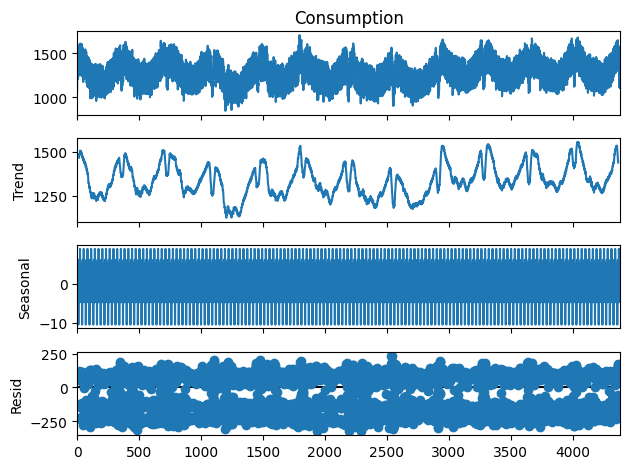

In [ ]:
#descomponemos la serie de tiempo
from statsmodels.tsa.seasonal import seasonal_decompose

result = seasonal_decompose(df_power_system['Consumption'], model='additive', period=30)
result.plot()
plt.show()#Descomponer la serie en componentes de tendencia, estacionalidad y residuo


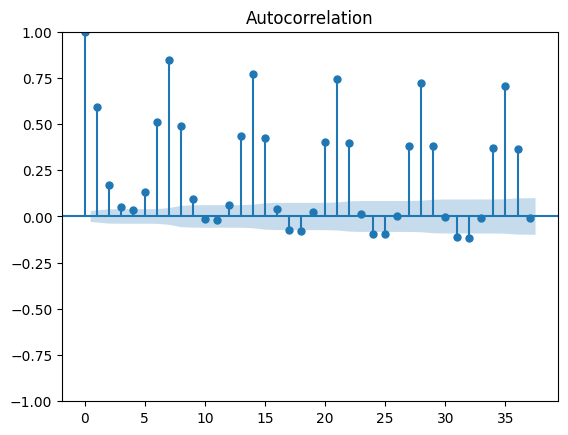

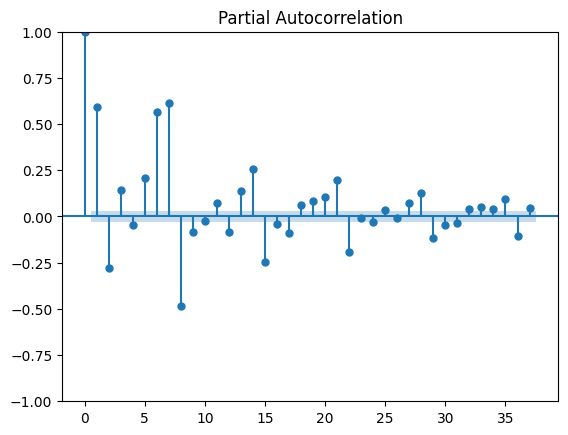

In [ ]:
#Análisis de Correlación

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plot_acf(df_power_system['Consumption'])
plt.show()

plot_pacf(df_power_system['Consumption'])
plt.show()


In [ ]:
df_power_system

,Unnamed: 0,Date,Consumption,Wind,Solar,Wind+Solar,media_movil
0,0,2006-01-01,1069.18400,NaN,NaN,NaN,NaN
1,1,2006-01-02,1380.52100,NaN,NaN,NaN,NaN
2,2,2006-01-03,1442.53300,NaN,NaN,NaN,NaN
3,3,2006-01-04,1457.21700,NaN,NaN,NaN,NaN
4,4,2006-01-05,1477.13100,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
4378,4378,2017-12-27,1263.94091,394.507,16.530,411.037,1266.125593
4379,4379,2017-12-28,1299.86398,506.424,14.162,520.586,1234.624439
4380,4380,2017-12-29,1295.08753,584.277,29.854,614.131,1216.317254
4381,4381,2017-12-30,1215.44897,721.247,7.467,728.714,1208.214129


In [ ]:
#implementación del modelo ARIMA
from statsmodels.tsa.arima.model import ARIMA

model = ARIMA(df_power_system['Consumption'], order=(5,1,0))
model_fit = model.fit()
print(model_fit.summary())




                               SARIMAX Results                                
Dep. Variable:            Consumption   No. Observations:                 4383
Model:                 ARIMA(5, 1, 0)   Log Likelihood              -26538.082
Date:                Sat, 24 May 2025   AIC                          53088.164
Time:                        00:37:12   BIC                          53126.476
Sample:                             0   HQIC                         53101.682
                               - 4383                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.2658      0.012    -22.037      0.000      -0.289      -0.242
ar.L2         -0.5718      0.011    -53.064      0.000      -0.593      -0.551
ar.L3         -0.4309      0.015    -27.874      0.0

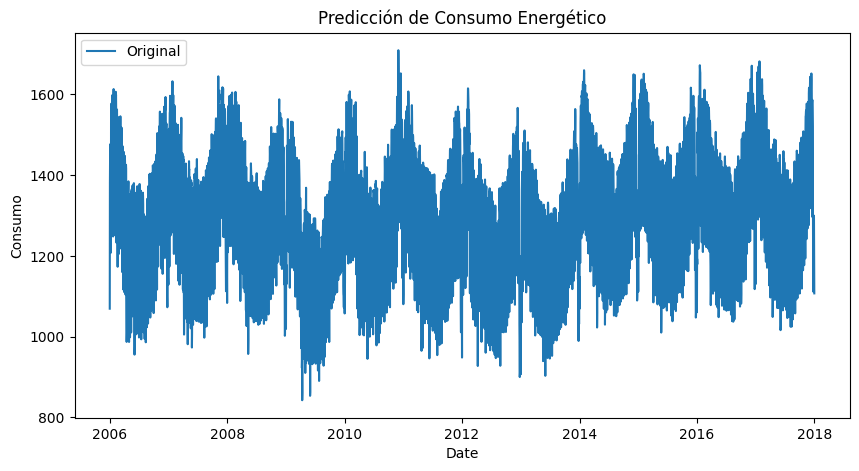

In [ ]:
forecast = model_fit.forecast(steps=30)
plt.figure(figsize=(10, 5))
plt.plot(df_power_system['Date'], df_power_system['Consumption'], label='Original')
#plt.plot(df_power_system['Date'][-30:],forecast, label='Predicción')
plt.title('Predicción de Consumo Energético')
plt.xlabel('Date')
plt.ylabel('Consumo')
plt.legend()
plt.show()

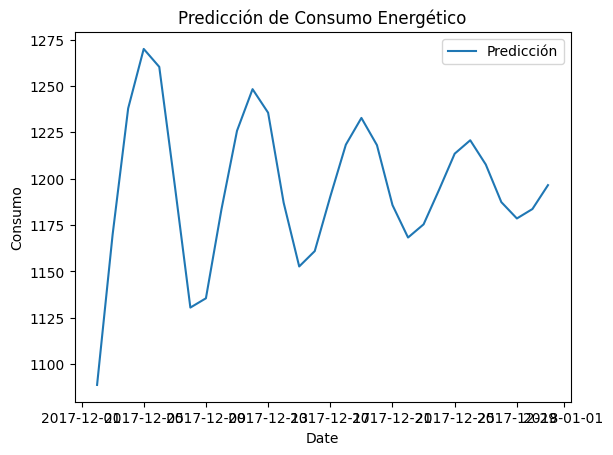

In [ ]:
plt.plot(df_power_system['Date'][-30:],forecast, label='Predicción')
plt.title('Predicción de Consumo Energético')
plt.xlabel('Date')
plt.ylabel('Consumo')
plt.legend()
plt.show()


# **Dataset Calidad del Aire**

In [ ]:
#Cargamos los CSV con los Datos
air_quality = pd.read_csv(base_dir + "air_quality.csv")
air_quality

,datetime,station_1,station_2,station_3
0,2019-05-07 02:00:00,NaN,NaN,23.0
1,2019-05-07 03:00:00,50.5,25.0,19.0
2,2019-05-07 04:00:00,45.0,27.7,19.0
3,2019-05-07 05:00:00,NaN,50.4,16.0
4,2019-05-07 06:00:00,NaN,61.9,NaN
...,...,...,...,...
1030,2019-06-20 22:00:00,NaN,21.4,NaN
1031,2019-06-20 23:00:00,NaN,24.9,NaN
1032,2019-06-21 00:00:00,NaN,26.5,NaN
1033,2019-06-21 01:00:00,NaN,21.8,NaN


## **Preposesamiento de los Datos**

In [ ]:
# muestre los 5 primeros datos
air_quality.head(5)

,datetime,station_1,station_2,station_3
0,2019-05-07 02:00:00,NaN,NaN,23.0
1,2019-05-07 03:00:00,50.5,25.0,19.0
2,2019-05-07 04:00:00,45.0,27.7,19.0
3,2019-05-07 05:00:00,NaN,50.4,16.0
4,2019-05-07 06:00:00,NaN,61.9,NaN


In [ ]:
print(air_quality.info())
print('\n')
print(air_quality.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1035 entries, 0 to 1034
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   datetime   1035 non-null   object 
 1   station_1  95 non-null     float64
 2   station_2  1004 non-null   float64
 3   station_3  969 non-null    float64
dtypes: float64(3), object(1)
memory usage: 32.5+ KB
None


       station_1    station_2   station_3
count  95.000000  1004.000000  969.000000
mean   25.778947    27.740538   24.777090
std    12.682019    15.285746   11.214377
min     7.500000     0.000000    0.000000
25%    16.750000    16.500000   19.000000
50%    23.000000    24.150000   25.000000
75%    34.500000    35.925000   31.000000
max    74.500000    97.000000   97.000000


In [ ]:
# Paso convertir  la columna datetime en un objeto datetime o serie de tiempo
air_quality['datetime'] = pd.to_datetime(air_quality['datetime'])
air_quality.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1035 entries, 0 to 1034
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   datetime   1035 non-null   datetime64[ns]
 1   station_1  95 non-null     float64       
 2   station_2  1004 non-null   float64       
 3   station_3  969 non-null    float64       
dtypes: datetime64[ns](1), float64(3)
memory usage: 32.5 KB


In [ ]:
# Convertimos la datetime (fecha) en el Index del dataset
air_quality = air_quality.set_index('datetime')
air_quality

,station_1,station_2,station_3
datetime,,,
2019-05-07 02:00:00,NaN,NaN,23.0
2019-05-07 03:00:00,50.5,25.0,19.0
2019-05-07 04:00:00,45.0,27.7,19.0
2019-05-07 05:00:00,NaN,50.4,16.0
2019-05-07 06:00:00,NaN,61.9,NaN
...,...,...,...
2019-06-20 22:00:00,NaN,21.4,NaN
2019-06-20 23:00:00,NaN,24.9,NaN
2019-06-21 00:00:00,NaN,26.5,NaN


In [ ]:
# Ordenamos la serie de tiempo de forma ascendente
air_quality.sort_index(inplace=True)
air_quality

,station_1,station_2,station_3
datetime,,,
2019-05-07 02:00:00,NaN,NaN,23.0
2019-05-07 03:00:00,50.5,25.0,19.0
2019-05-07 04:00:00,45.0,27.7,19.0
2019-05-07 05:00:00,NaN,50.4,16.0
2019-05-07 06:00:00,NaN,61.9,NaN
...,...,...,...
2019-06-20 22:00:00,NaN,21.4,NaN
2019-06-20 23:00:00,NaN,24.9,NaN
2019-06-21 00:00:00,NaN,26.5,NaN


In [ ]:
# Eliminar las columnas irrelevantes

# En este dataset no tiene columnas irrelevantes

In [ ]:
# Identificar datos faltantes
print('Cantidad de Datos Faltantes')
for column in air_quality:
  nans = air_quality[column].isna().sum()
  print(f'\tColumna{column}: {nans}')

Cantidad de Datos Faltantes
	Columnastation_1: 940
	Columnastation_2: 31
	Columnastation_3: 66


In [ ]:
# Analizar la periodicidad
df_time_diffs = air_quality.index.to_series().diff().dt.total_seconds()

print(df_time_diffs.value_counts())

datetime
3600.0     1031
39600.0       2
97200.0       1
Name: count, dtype: int64


In [ ]:
#Verificar que no existan datos repetidos
print(f'Tamaño del dataset antes de eliminar las filas repetidas es: {air_quality.shape}')
air_quality.drop_duplicates(inplace=True)
print(f'Tamaño del dataset después de eliminar las filas repetidas es: {air_quality.shape}')

Tamaño del dataset antes de eliminar las filas repetidas es: (1035, 3)
Tamaño del dataset después de eliminar las filas repetidas es: (982, 3)


In [ ]:
# Si se tienen multiples intervalos de tiempo conviene dejar uno solo
df2 = air_quality.asfreq(freq='H', method='bfill' )

df_time_diffs = df2.index.to_series().diff().dt.total_seconds()

print(df_time_diffs.value_counts())

print('\n')
# Identificar datos faltantes
print('Cantidad de Datos Faltantes')
for column in df2:
  nans = df2[column].isna().sum()
  print(f'\tColumna{column}: {nans}')


datetime
3600.0    1079
Name: count, dtype: int64


Cantidad de Datos Faltantes
	Columnastation_1: 982
	Columnastation_2: 32
	Columnastation_3: 111


In [ ]:
# Verificar Que el promedio no se vea afectado por el muestreo
for column in air_quality:
  print(f'Promedio dataset Original {air_quality[column].mean()}')
  print(f'Promedio dataset Modificado {df2[column].mean()}')

Promedio dataset Original 25.778947368421054
Promedio dataset Modificado 25.494897959183675
Promedio dataset Original 28.01406411582213
Promedio dataset Modificado 27.457251908396945
Promedio dataset Original 24.825
Promedio dataset Modificado 24.804953560371516


In [ ]:
# Al ser unas estaciones metereologicas podriamos usar que llene con el
# dato proximo no nulo
Corregido = air_quality.ffill().bfill()
print (Corregido)

Corregido2 =df2.ffill().bfill()
print (Corregido2)

print('Cantidad de Datos Faltantes')
for column in Corregido:
  nans = Corregido[column].isna().sum()
  print(f'\tColumna{column}: {nans}')


print('\nCantidad de Datos Faltantes')
for column in Corregido2:
  nans = Corregido2[column].isna().sum()
  print(f'\tColumna{column}: {nans}')


# Verificar Que el promedio no se vea afectado por el muestreo
for column in air_quality:
  print(f'\nPromedio dataset Original {air_quality[column].mean()}')
  print(f'Promedio dataset df2 {df2[column].mean()}')
  print(f'Promedio dataset Corregido {Corregido[column].mean()}')
  print(f'Promedio dataset Corregido2 {Corregido2[column].mean()}')

                     station_1  station_2  station_3
datetime                                            
2019-05-07 02:00:00       50.5       25.0       23.0
2019-05-07 03:00:00       50.5       25.0       19.0
2019-05-07 04:00:00       45.0       27.7       19.0
2019-05-07 05:00:00       45.0       50.4       16.0
2019-05-07 06:00:00       45.0       61.9       16.0
...                        ...        ...        ...
2019-06-20 20:00:00       41.0       23.9       11.0
2019-06-20 21:00:00       41.0       25.3       11.0
2019-06-20 22:00:00       41.0       21.4       11.0
2019-06-20 23:00:00       41.0       24.9       11.0
2019-06-21 01:00:00       41.0       21.8       11.0

[982 rows x 3 columns]
                     station_1  station_2  station_3
datetime                                            
2019-05-07 02:00:00       50.5       25.0       23.0
2019-05-07 03:00:00       50.5       25.0       19.0
2019-05-07 04:00:00       45.0       27.7       19.0
2019-05-07 05:00:00   

## **Analisis Exploratorio de Datos**

In [ ]:
# muestre un analisis exploratorio de los datos

In [ ]:
# muestre de datos horarios a datos medios diarios de cada una de las estaciones
air_quality.resample('W')

In [ ]:
# muestre de datos horarios a datos medios mensual de cada una de las estaciones

In [ ]:
# muestre de datos horarios a datos medios anual de cada una de las estaciones

In [ ]:
# muestre el dato maximo diario de cada una de las estaciones

In [ ]:
# muestre el dato maximo mes de cada una de las estaciones

In [ ]:
# muestre el dato maximo año de cada una de las estaciones

In [ ]:
# muestre el dato minimo diario de cada una de las estaciones

In [ ]:
# muestre el dato minimo mes de cada una de las estaciones

In [ ]:
# muestre el dato minimo año de cada una de las estaciones

In [ ]:
# Construir un diagráma de cada una de las estaciones

In [ ]:
# Construir un diagráma de olas

In [ ]:
# Construir un diagráma de cajas o boxplot

In [ ]:
#Cargamos los CSV con los Datos
mpi_roof_2022b = pd.read_csv(base_dir + "mpi_roof_2022b.csv", encoding='latin1')
mpi_roof_2022b

,Date Time,p (mbar),T (degC),Tpot (K),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),...,wv (m/s),max. wv (m/s),wd (deg),rain (mm),raining (s),SWDR (W/m²),PAR (µmol/m²/s),max. PAR (µmol/m²/s),Tlog (degC),CO2 (ppm)
0,01.07.2022 00:10:00,984.33,22.42,296.91,19.72,84.70,27.17,23.01,4.16,14.67,...,1.18,1.63,219.9,0.0,0.0,0.0,0.0,0.0,31.74,447.2
1,01.07.2022 00:20:00,984.36,22.02,296.50,19.72,86.80,26.51,23.01,3.50,14.67,...,1.02,1.58,222.4,0.0,0.0,0.0,0.0,0.0,31.63,445.6
2,01.07.2022 00:30:00,984.35,21.77,296.25,19.68,87.90,26.11,22.95,3.16,14.63,...,0.99,1.64,191.0,0.0,0.0,0.0,0.0,0.0,31.52,443.1
3,01.07.2022 00:40:00,984.27,22.00,296.49,19.47,85.60,26.48,22.67,3.81,14.45,...,1.45,2.40,211.8,0.0,0.0,0.0,0.0,0.0,31.44,443.4
4,01.07.2022 00:50:00,984.36,22.23,296.71,19.40,84.00,26.86,22.56,4.30,14.38,...,1.66,2.59,211.9,0.0,0.0,0.0,0.0,0.0,31.37,444.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26410,31.12.2022 23:20:00,988.09,16.83,290.98,7.37,53.59,19.20,10.29,8.91,6.50,...,6.39,10.66,206.1,0.0,0.0,0.0,0.0,0.0,22.66,421.4
26411,31.12.2022 23:30:00,988.26,16.76,290.89,7.38,53.84,19.11,10.29,8.82,6.50,...,5.73,9.93,207.4,0.0,0.0,0.0,0.0,0.0,22.68,421.4
26412,31.12.2022 23:40:00,988.47,16.72,290.83,7.20,53.32,19.07,10.17,8.90,6.42,...,5.26,8.07,203.9,0.0,0.0,0.0,0.0,0.0,22.71,421.4
26413,31.12.2022 23:50:00,988.62,16.68,290.78,6.97,52.62,19.02,10.01,9.01,6.32,...,5.55,11.47,212.0,0.0,0.0,0.0,0.0,0.0,22.74,421.3




# **Variables del Data**

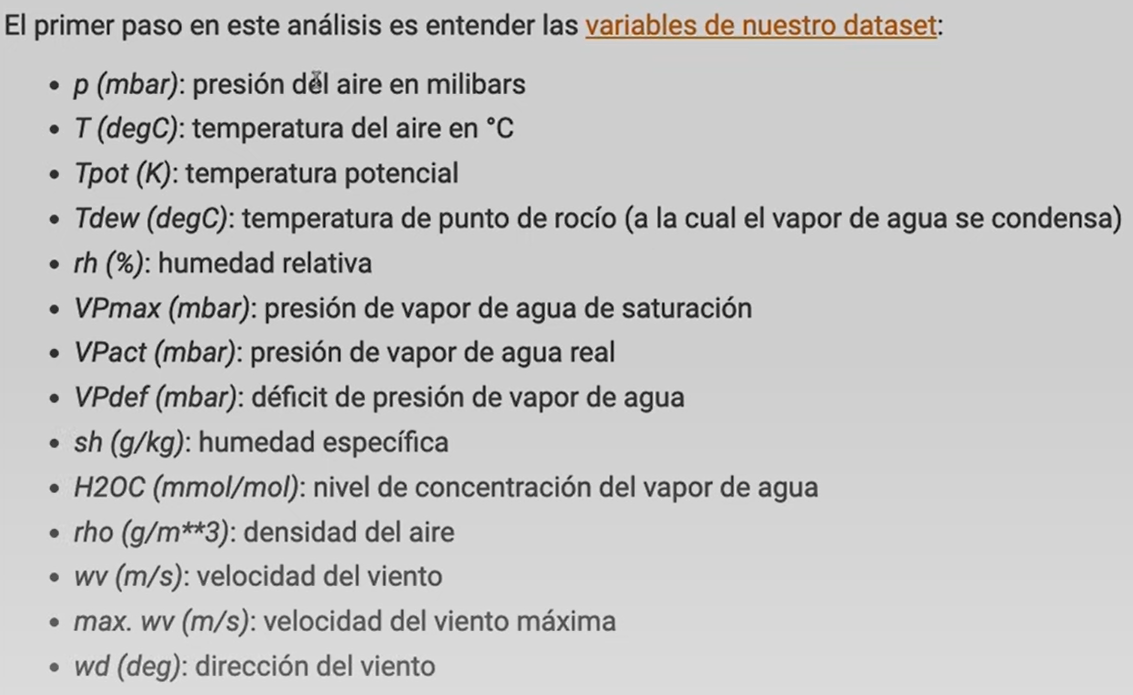